# MNIST Handwritten Digit Recognition

# Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# Loading the MNIST datasets

In [2]:
data_df = pd.read_csv("data.csv")
#test_df = pd.read_csv("test.csv")

In [3]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#test_df.head()

# For train and test both we will use train.csv (Taking train data as complete data)

In [5]:
data_df.shape

(42000, 785)

# Data Preparation for Model Building

In [6]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [7]:
#x_for_test_data=test_df[:]

In [8]:
type(x)

pandas.core.frame.DataFrame

5


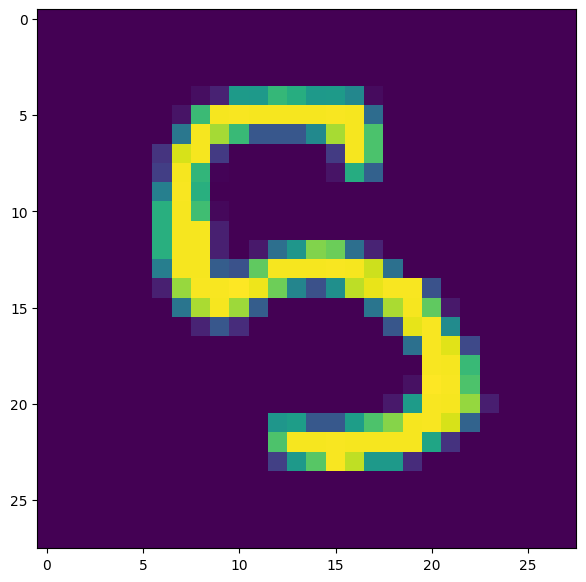

In [9]:
plt.figure(figsize=(7,7))
some_digit=1265
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

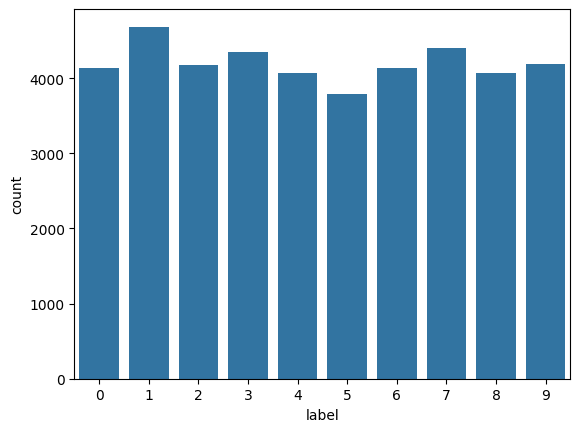

In [10]:
sns.countplot( x='label', data=data_df) 

#### we can conclude that our dataset is balanced

# Splitting the train data  into train and test 

In [11]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [12]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

# **Models**

# KNN

In [13]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

# k=3

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 2, 4, 7], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))

0.9636507936507936


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1236
           1       0.96      1.00      0.98      1370
           2       0.98      0.96      0.97      1252
           3       0.95      0.96      0.95      1369
           4       0.97      0.96      0.97      1215
           5       0.95      0.95      0.95      1132
           6       0.97      0.99      0.98      1216
           7       0.96      0.96      0.96      1326
           8       0.98      0.92      0.95      1197
           9       0.94      0.94      0.94      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [18]:
print(confusion_matrix(y_test, y_pred))

[[1224    0    2    0    0    1    6    0    1    2]
 [   0 1364    0    0    0    0    2    2    1    1]
 [   5   10 1204    6    1    1    2   18    2    3]
 [   3    4    6 1315    0   22    1    7    9    2]
 [   2   12    1    0 1165    0    5    1    0   29]
 [   3    1    1   27    2 1075   16    0    2    5]
 [  10    1    0    0    1    3 1201    0    0    0]
 [   1   17    5    0    0    0    0 1278    1   24]
 [   5    8    7   25   11   21    2    4 1102   12]
 [   7    5    1   12   18    6    0   21    3 1214]]


In [19]:
#y_pred_on_test_data = classifier.predict(x_for_test_data)
#y_pred_on_test_data

## **3NN-96.65% accuracy**